#### Objective: To predict daily sales for the given store for the given SKU

Training data duration: 5 years

Features:
*   Date
*   Store_Number (Total 10 Stores)
*   Item_Number (With 50 items/store)
*   Sales (Daily sales/store/item)

Test data duration: 3 months





### Importing requried libraries for preprocessing:

- **pandas**: Used for data manipulation and analysis, especially with structured data like tables and time series. It provides data structures like DataFrames that make working with data intuitive and efficient.
- **numpy**: A fundamental package for numerical computation in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays.
- **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for plotting various types of graphs and charts.
- **sklearn** (scikit-learn): A powerful and popular machine learning library that provides a wide range of algorithms for classification, regression, clustering, model selection, and preprocessing utilities.
- **tensorflow**: An open-source machine learning platform developed by Google. It is primarily used for building and training deep learning models, enabling both research and production deployment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf


1. Reading train.csv files and splitting data into X_train,  Y_train df's for model training
2. Reading test.csv and storing X_test df for testing the model

In [ ]:
train = pd.read_csv("train.csv", index_col=0, parse_dates=True)
X_train=pd.read_csv("train.csv", index_col=0, parse_dates=True).iloc[:,[0,1]]
y_train=pd.read_csv("train.csv", index_col=0, parse_dates=True).iloc[:,[2]]
X_test=pd.read_csv("test.csv", index_col=1, parse_dates=True).iloc[:,[1,2]]
print(X_train.head())
print(y_train.head())
print(X_test.head())

            store  item
date                   
2013-01-01      1     1
2013-01-02      1     1
2013-01-03      1     1
2013-01-04      1     1
2013-01-05      1     1
            sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10
            store  item
date                   
2018-01-01      1     1
2018-01-02      1     1
2018-01-03      1     1
2018-01-04      1     1
2018-01-05      1     1


Finding Null values in the data

In [ ]:
print(X_train.info(), y_train.info(), X_test.info())
print(X_train.shape, y_train.shape, X_test.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
dtypes: int64(2)
memory usage: 20.9 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   sales   913000 non-null  int64
dtypes: int64(1)
memory usage: 13.9 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45000 entries, 2018-01-01 to 2018-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   45000 non-null  int64
 1   item    45000 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB
None None None
(913000, 2) (913000, 1) (45000, 2)


Descriptive Stats

In [ ]:
print(X_train.describe(), "\n" ,y_train.describe(), "\n ",X_test.describe())

               store           item
count  913000.000000  913000.000000
mean        5.500000      25.500000
std         2.872283      14.430878
min         1.000000       1.000000
25%         3.000000      13.000000
50%         5.500000      25.500000
75%         8.000000      38.000000
max        10.000000      50.000000 
                sales
count  913000.000000
mean       52.250287
std        28.801144
min         0.000000
25%        30.000000
50%        47.000000
75%        70.000000
max       231.000000 
                store         item
count  45000.000000  45000.00000
mean       5.500000     25.50000
std        2.872313     14.43103
min        1.000000      1.00000
25%        3.000000     13.00000
50%        5.500000     25.50000
75%        8.000000     38.00000
max       10.000000     50.00000


#### Category Type Conversion

To optimize memory usage and ensure proper handling by machine learning models, the 'store' and 'item' columns in both `X_train` and `X_test` DataFrames were converted to the 'category' data type.

**Benefits of this conversion:**

1.  **Memory Efficiency**: Categorical data types store values as integer codes, which can significantly reduce memory consumption, especially when columns have a limited number of unique values (like store and item IDs) but many rows.
2.  **Machine Learning Model Compatibility**: Many machine learning algorithms, particularly those designed for tabular data, perform better or explicitly require categorical features to be properly encoded (e.g., one-hot encoding). Converting to 'category' first makes these subsequent encoding steps more straightforward and efficient.
3.  **Performance**: Operations on categorical types can sometimes be faster than on object (string) types due to the underlying integer representation.

This conversion ensures that these nominal features are treated appropriately throughout the data preprocessing and model training pipeline.

In [ ]:
X_train['store'] = X_train['store'].astype('category')
X_train['item'] = X_train['item'].astype('category')
X_test['store'] = X_test['store'].astype('category')
X_test['item'] = X_test['item'].astype('category')

print("Info for train_df after converting 'store' and 'item' to category:\n")
print(X_train.info())
print("\nInfo for X_test after converting 'store' and 'item' to category:\n")
print(X_test.info())

Info for train_df after converting 'store' and 'item' to category:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   store   913000 non-null  category
 1   item    913000 non-null  category
dtypes: category(2)
memory usage: 8.7 MB
None

Info for X_test after converting 'store' and 'item' to category:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45000 entries, 2018-01-01 to 2018-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   store   45000 non-null  category
 1   item    45000 non-null  category
dtypes: category(2)
memory usage: 442.3 KB
None


### Sales Data Visualizations

1.  **Daily Sales by Items**: This plot visualizes the aggregated daily sales across all items. Its primary purpose is to help observe the overall sales level, identify long-term trends (e.g., increasing or decreasing sales over years), and detect any recurring seasonality patterns, such as weekly cycles (higher sales on weekends) or yearly cycles (peak sales during holidays).

2.  **Total Sales by Store**: This plot illustrates the total sales accumulated over the entire period for each individual store. It is crucial for comparing the sales performance across different stores, allowing us to identify which stores are top performers and which might be underperforming. This can inform resource allocation and strategic planning.

3.  **Total Sales by Items**: This visualization displays the total sales for each specific item over the observed period. By examining this plot, we can identify best-selling items, which contribute most significantly to revenue, as well as least-selling items. This insight is valuable for inventory management, marketing strategies, and product development.

Collectively, these visualizations provide initial, high-level insights into the sales data's structure and behavior. They help us understand the general patterns, identify key contributing factors (like store and item performance), and detect temporal variations that will be critical for building an accurate predictive model.

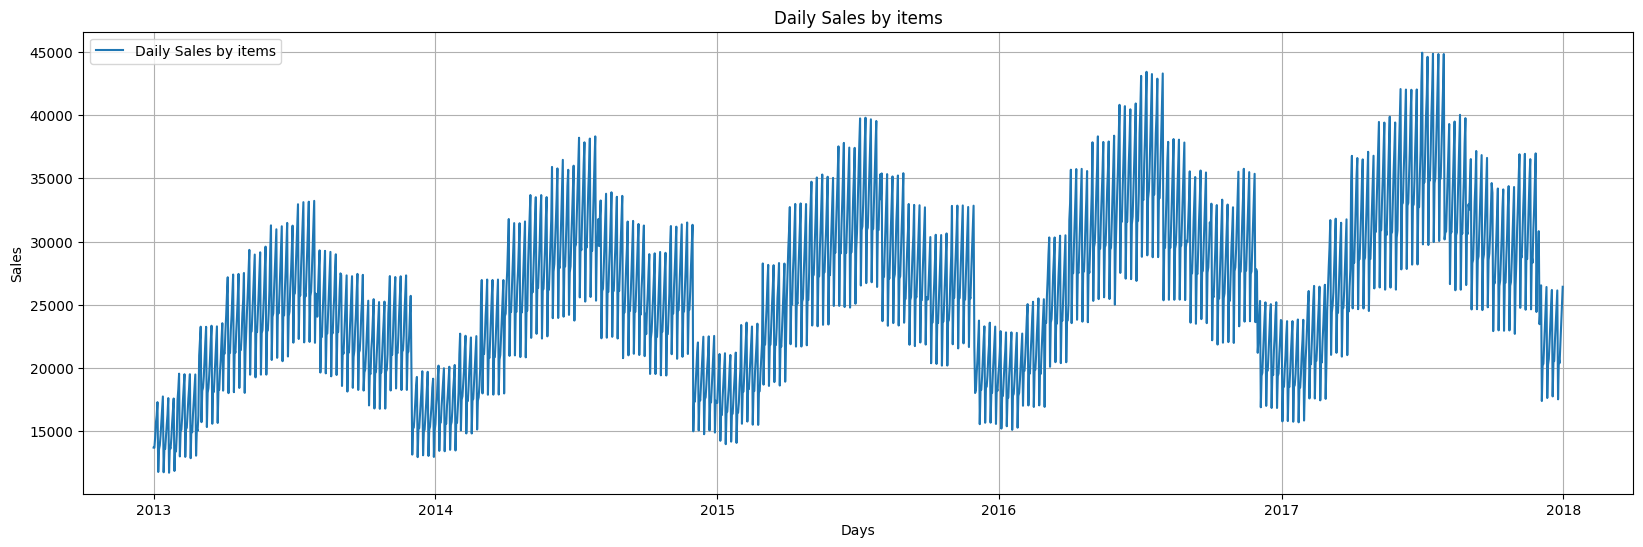

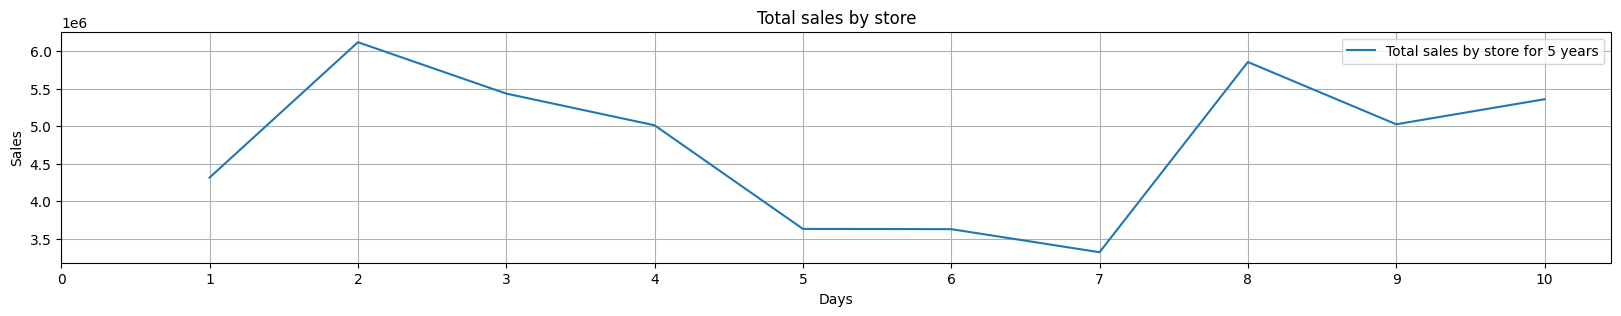

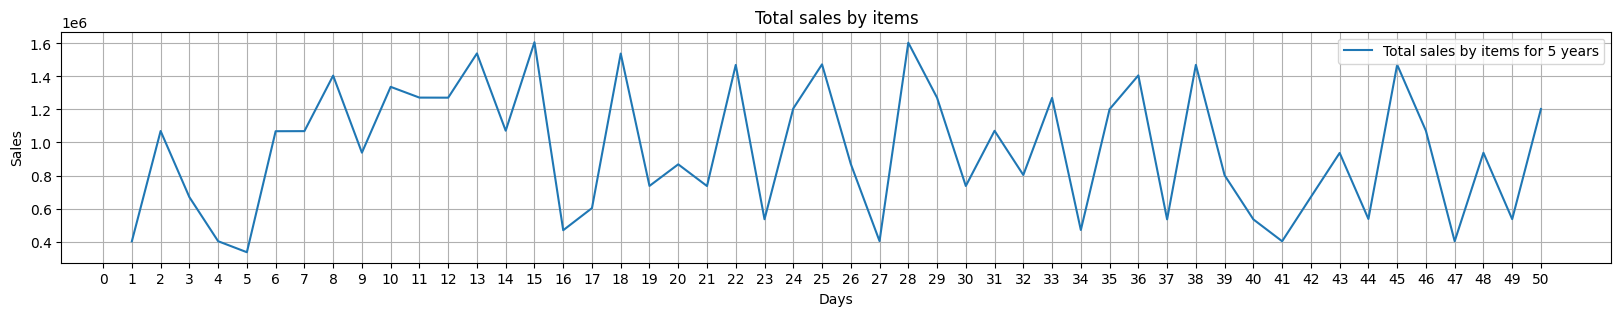

In [ ]:
# 1. Group by Sales: To osbserve if there is level, trend, and seasonality in the daily sales:

daily_sales_of_items = train.groupby('date')['sales'].sum()

plt.figure(figsize=(20, 6))
plt.plot(daily_sales_of_items.index, daily_sales_of_items.values, label='Daily Sales by items')
plt.title('Daily Sales by items')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# print("\n\n")

# 2. Group by store:

total_sales_by_store = train.groupby('store')['sales'].sum()

plt.figure(figsize=(20, 3))
plt.plot(total_sales_by_store.index, total_sales_by_store.values, label='Total sales by store for 5 years')
plt.title('Total sales by store')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.xticks(range(11), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend()
plt.grid(True)

# print("\n\n")

# 3. Group by items:

total_sales_by_items = train.groupby('item')['sales'].sum()

plt.figure(figsize=(20, 3))
plt.plot(total_sales_by_items.index, total_sales_by_items.values, label='Total sales by items for 5 years')
plt.title('Total sales by items')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.xticks(range(51))
plt.legend()
plt.grid(True)

#### Feature Engineering for Training Data

To enhance the model's ability to capture underlying patterns in the sales data, new time-based features were extracted from the datetime index of the `X_train` DataFrame. These features are:

*   **'month'**: Extracted to identify monthly trends and seasonal variations. Sales often exhibit patterns that repeat every year based on the month (e.g., higher sales during holiday seasons or specific times of the year).

*   **'year'**: Included to capture long-term trends and yearly growth or decline patterns. This helps the model understand how sales evolve over different years.

*   **'day'** (day of the week): Derived to account for weekly seasonality. Sales typically vary significantly based on the day of the week (e.g., weekends vs. weekdays).

These additional features provide crucial temporal context to the model, allowing it to better learn and predict sales fluctuations that are influenced by seasonal and cyclical patterns, thereby improving overall prediction accuracy.

In [ ]:
# Adding dummy variable for months as varying trend is observed in the data monthly
# Adding dummy variable for year and days of week as varying seasonality is observed in the data yearly and weekly.

X_train['month'] = X_train.index.month
X_train['year'] = X_train.index.year
X_train['day'] = X_train.index.dayofweek

X_train.head()

,store,item,month,year,day
date,,,,,
2013-01-01,1,1,1,2013,1
2013-01-02,1,1,1,2013,2
2013-01-03,1,1,1,2013,3
2013-01-04,1,1,1,2013,4
2013-01-05,1,1,1,2013,5


### One-Hot Encoding for Training Data

One-Hot Encoding is a crucial step in preparing categorical data for machine learning models. It converts categorical variables into a numerical format that models can understand and process.

In this notebook, One-Hot Encoding is applied to the following features in `X_train`:

*   **Categorical features**: `store` and `item`.
*   **Newly engineered time-based features**: `month`, `year`, and `day`.

#### Why One-Hot Encode?

Machine learning algorithms typically require numerical input. Categorical features like 'store' (e.g., Store 1, Store 2) or 'item' (e.g., Item 1, Item 2) are not inherently numerical. Simply assigning integer labels (e.g., 1, 2, 3) to these categories can imply an ordinal relationship (e.g., Store 2 is 'greater' than Store 1), which might not exist and can mislead the model. One-Hot Encoding solves this by creating new binary columns for each unique category. For instance, if 'store' has 10 unique values, 10 new columns will be created, and for each row, only the column corresponding to its store will have a '1', while others will have '0'. This avoids imposing any artificial order.

Similarly, while `month`, `year`, and `day` are numerical, treating them as categorical (especially month and day of the week) allows the model to capture non-linear relationships and seasonality better. For example, sales patterns for January might be very different from February, and One-Hot Encoding helps represent these distinct patterns without implying a continuous relationship.

#### Implementation with `OneHotEncoder`

The `OneHotEncoder` from `sklearn.preprocessing` is used to perform this transformation. The `fit_transform` method learns the unique categories from the specified columns (`store`, `item`, `month`, `year`, `day`) in `X_train` and then transforms them into a sparse matrix of binary vectors. The `sparse_output=False` argument ensures that the output is a dense NumPy array.

After encoding, `encoder.get_feature_names_out(['store', 'item', 'month', 'year', 'day'])` is used to retrieve meaningful column names for the newly created one-hot encoded features. This makes the resulting DataFrame more interpretable. Finally, the dense NumPy array is converted into a Pandas DataFrame, `X_train_encoded_df`, maintaining the original `DatetimeIndex` from `X_train` for structured data handling.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[['store','item','month','year', 'day']])

# Get the new feature names
feature_names_out = encoder.get_feature_names_out(['store', 'item','month','year', 'day'])

# Convert the dense array to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names_out, index=X_train.index)

X_train_encoded_df.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,year_2015,year_2016,year_2017,day_0,day_1,day_2,day_3,day_4,day_5,day_6
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Training Data Predictions and Visualization

1.  **Generating Predictions**: The `model.predict(X_train_encoded_df)` function is used to generate sales predictions for the entire training dataset. `X_train_encoded_df` contains the one-hot encoded features (store, item, month, year, day) for all training records.

2.  **Storing Predictions**: These predictions are then stored in a new DataFrame called `y_pred_df`. This DataFrame is structured to have the same date index as the original `y_train` DataFrame, ensuring that predictions can be directly compared with actual sales on a daily basis.

3.  **Aggregating Daily Predicted Sales**: To compare with the total daily actual sales, the predictions in `y_pred_df` are aggregated. This is done by grouping `y_pred_df` by the `date` index and summing the `predicted sales` for each day. This creates the `daily_predicted_sales_of_items` Series, which represents the total predicted sales across all stores and items for each day in the training period, mirroring the `daily_sales_of_items` for actual sales.

4.  **Purpose of the Visualization**: The plot generated after these steps visually compares the `daily_predicted_sales_of_items` with the `daily_sales_of_items` over the entire training period. The actual sales data provides the ground truth, while the predicted sales show how well our Linear Regression model is capturing the patterns.

5.  **Insights from Visualization**: This visualization is crucial for a qualitative assessment of the model's performance. By observing the overlap and deviation between the two lines, we can gain insights into:
    *   **Trend Capture**: How well the model follows the general upward or downward movement of sales over time.
    *   **Seasonality Capture**: Whether the model successfully identifies and replicates seasonal peaks and troughs (e.g., monthly or yearly patterns).
    *   **Overall Sales Level**: If the predicted sales generally match the magnitude of actual sales.
    *   **Areas of Deviation**: Specific periods or instances where the model's predictions significantly differ from actual sales, which might indicate limitations or areas for further improvement in feature engineering or model selection.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_train_encoded_df, y_train["sales"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_t_train, y_t_train)

model.score(X_t_test, y_t_test)

0.8708388058351705

            predicted sales
date                       
2013-01-01       -12.538770
2013-01-02       -12.537979
2013-01-03        -9.084874
2013-01-04        -5.655102
2013-01-05        -2.238051
count     1826.000000
mean     26124.038269
std       6364.184036
min       7925.068395
25%      21628.297394
50%      26403.464987
75%      30844.170750
max      41727.161076
Name: predicted sales, dtype: float64


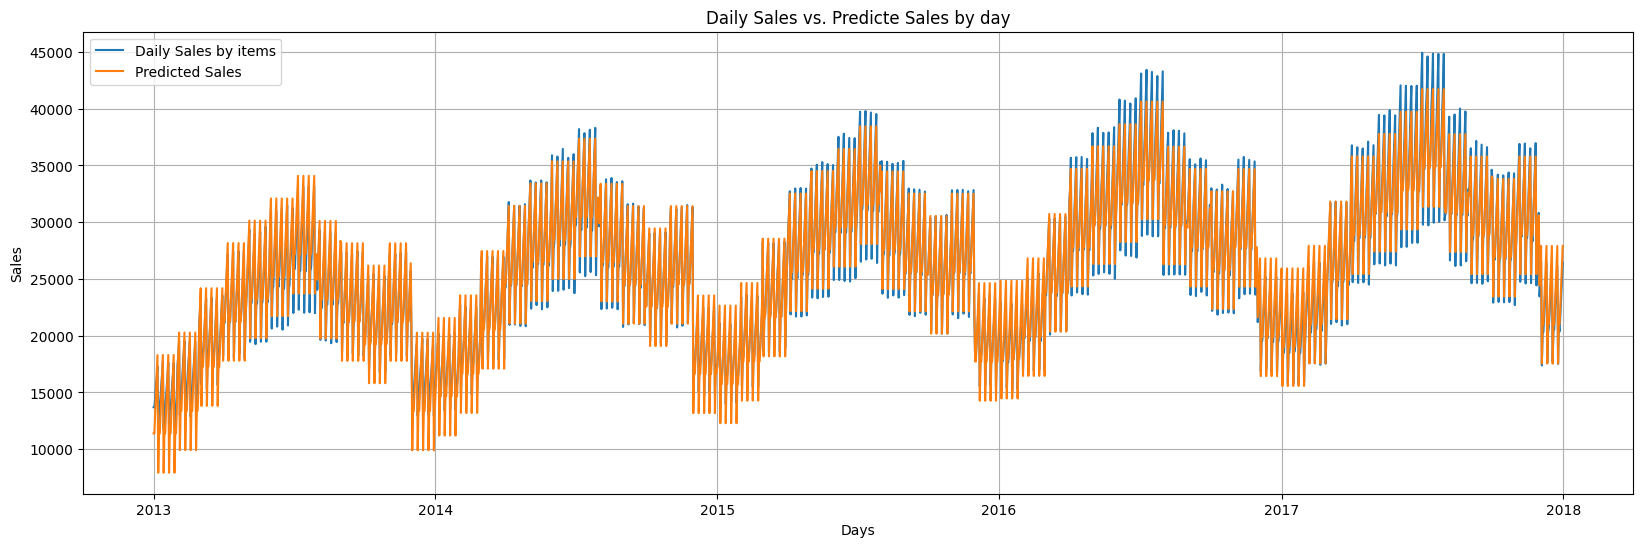

In [ ]:
y_pred_df = pd.DataFrame(model.predict(X_train_encoded_df), index=y_train.index, columns=['predicted sales'])

daily_predicted_sales_of_items = y_pred_df.groupby('date')['predicted sales'].sum()

daily_sales_of_items = y_train.groupby('date')['sales'].sum()

print(y_pred_df.head())
print(daily_predicted_sales_of_items.describe())

plt.figure(figsize=(20, 6))
plt.plot(daily_sales_of_items.index, daily_sales_of_items.values, label='Daily Sales by items')
plt.plot(daily_predicted_sales_of_items.index, daily_predicted_sales_of_items.values, label='Predicted Sales')
plt.title('Daily Sales vs. Predicte Sales by day')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)



### Evaluation Metrics for Model Performance

To effectively assess how well a predictive model performs, especially in regression tasks like sales forecasting, it's crucial to utilize appropriate evaluation metrics. These metrics provide quantitative measures that help us understand the model's accuracy, reliability, and how much of the variance in the target variable it can explain.

1.  **Root Mean Squared Error (RMSE)**:
    *   **What it represents**: RMSE is a widely used metric for evaluating the performance of regression models. It measures the average magnitude of the errors between predicted values and actual values. Specifically, it calculates the square root of the average of the squared differences between predictions and actual observations.
    *   **Formula**:
        RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
        where:
        *   n is the number of observations.
        *   yi is the actual value for the i-th observation.
        *   $\hat{y}_i$ is the predicted value for the i-th observation.
    *   **Why it's useful for sales prediction**: RMSE penalizes larger errors more heavily than smaller ones due to the squaring of differences. This is particularly useful in sales prediction because large prediction errors (e.g., significantly over- or under-forecasting sales) can have substantial business implications. A lower RMSE indicates a better fit of the model to the data, meaning the predictions are, on average, closer to the actual sales figures.

2.  **R-squared (R2 Score)**:
    *   **What it represents**: R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable (sales) that can be explained by the independent variables (features) in the model. In simpler terms, it indicates how well the model's predictions approximate the actual values.
    *   **Range**: R-squared typically ranges from 0 to 1, but can be negative in some cases (though this usually indicates a very poor model fit, possibly worse than simply predicting the mean).
        *   An R-squared of 0 means that the model explains none of the variability of the response data around its mean.
        *   An R-squared of 1 means that the model explains all the variability of the response data around its mean.
    *   **Interpretation**:
        *   A higher R-squared value generally indicates a better fit for the model. For example, an R-squared of 0.87 means that 87% of the variation in sales can be explained by the features included in the linear regression model. The remaining 13% is unexplained variation.
        *   It helps in understanding the goodness of fit: the higher the R-squared, the more variance is explained, and the better the model fits the observed data. However, it's important to note that a high R-squared doesn't necessarily mean the model is perfect or that there isn't a better model; it merely indicates how much variance is explained.

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(root_mean_squared_error(y_train["sales"], y_pred_df))
print(r2_score(y_train["sales"], y_pred_df))

10.37035033493066
0.8703513894491703


#### Feature Engineering and One-Hot Encoding for Test Data

To prepare the `X_test` dataset for prediction, the same feature engineering and one-hot encoding steps applied to `X_train` must also be applied to `X_test`. This ensures that the test data has the exact same feature set and structure as the training data, which is crucial for the model to make accurate predictions.

### Date-based Feature Engineering

First, we extract date-based features from the `X_test` DataFrame's datetime index. Specifically, 'month', 'year', and 'day of the week' (represented as 'day') are added as new columns to `X_test`. This step mirrors the feature creation in `X_train`, capturing potential monthly, yearly, and weekly seasonality in the sales data.

### One-Hot Encoding for Categorical Features

Next, `OneHotEncoder` is used to transform the categorical features in `X_test`: 'store', 'item', 'month', 'year', and 'day'. It is critically important to use the *same `OneHotEncoder` instance* that was `fit_transform`ed on `X_train`. This ensures that `X_test` is encoded using the identical categories and feature order learned from `X_train`. Using a new encoder or refitting on `X_test` would lead to inconsistencies in the feature columns, making the model incompatible.

The `transform` method of the previously fitted `encoder` is applied to `X_test` to generate `X_test_encoded`. The `feature_names_out` attribute of the encoder is then used to assign meaningful column names to the resulting `X_test_encoded_df` DataFrame, maintaining clarity and consistency with `X_train_encoded_df`.

### Ensuring Consistency

After encoding, it is essential to verify that `X_test_encoded_df` and `X_train_encoded_df` have the *same number of features* (columns). Discrepancies in the number or order of columns would indicate an issue in the encoding process, potentially due to `handle_unknown='ignore'` or differing categories between train and test sets for 'month' or 'year'. Manually adding missing columns with zero values might be necessary if the test set has fewer unique categories for a feature (e.g., year) than the training set. This strict consistency is paramount for the trained model to correctly interpret the test data.

In [ ]:
X_test['month'] = X_test.index.month
X_test['year'] = X_test.index.year
X_test['day'] = X_test.index.dayofweek

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_test_encoded = encoder.fit_transform(X_test[['store','item','month','year', 'day']])

# Get the new feature names
feature_names_out = encoder.get_feature_names_out(['store', 'item','month','year', 'day'])

# Convert the dense array to a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names_out, index=X_test.index)

print(X_test_encoded_df.shape)
print(X_train_encoded_df.shape)


(45000, 71)
(913000, 84)


#### Test Data Prediction Preparation and Execution

To ensure that the `LinearRegression` model, which was trained on `X_train_encoded_df`, can correctly make predictions on `X_test_encoded_df`, it is crucial that both DataFrames have the exact same columns in the same order. This is a common requirement when using `OneHotEncoder` and subsequently applying a trained model.

In our case, the `X_train_encoded_df` contains one-hot encoded columns for years 'year_2013' through 'year_2017' and months 'month_1' through 'month_12'. However, the `X_test_encoded_df` (which corresponds to the year 2018 and only months 1-3) does not naturally generate columns for years beyond 2017 or months beyond 3. Consequently, columns like 'year_2019', 'year_2020', 'year_2021', 'year_2022' (if they were present in the training set and not in test) and 'month_4' through 'month_12' are missing from `X_test_encoded_df`.

To address this, these missing year and month columns are manually added to `X_test_encoded_df`. The values for these newly added columns are set to `0`. This signifies that these specific categories (e.g., the year 2019, or month 4) are not present in the test dataset, maintaining consistency with the one-hot encoding scheme used during training. This step ensures that `X_test_encoded_df` now has the identical feature space (number and order of columns) as `X_train_encoded_df`, which is essential for the model to interpret the input correctly.

Once `X_test_encoded_df` is prepared with all the necessary columns, the trained `model.predict()` method is called with this DataFrame to generate sales predictions for each entry in the test dataset. These predictions, representing the model's forecasted sales, are then stored in a new column named 'Predicted Sales' within the original `test` DataFrame. This makes it convenient to view the predictions alongside the original test data, allowing for easy analysis or preparation for submission.

In [ ]:
X_test_encoded_df['year_2019'] = 0
X_test_encoded_df['year_2020'] = 0
X_test_encoded_df['year_2021'] = 0
X_test_encoded_df['year_2022'] = 0

X_test_encoded_df['month_4'] = 0
X_test_encoded_df['month_5'] = 0
X_test_encoded_df['month_6'] = 0
X_test_encoded_df['month_7'] = 0
X_test_encoded_df['month_8'] = 0
X_test_encoded_df['month_9'] = 0
X_test_encoded_df['month_10'] = 0
X_test_encoded_df['month_11'] = 0
X_test_encoded_df['month_12'] = 0

print(X_test_encoded_df.shape)
print(X_train_encoded_df.shape)

test = pd.read_csv("test.csv", index_col=1, parse_dates=True)
test['Predicted Sales'] = model.predict(X_test_encoded_df.values)
test.head()

(45000, 84)
(913000, 84)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,id,store,item,Predicted Sales
date,,,,
2018-01-01,0,1,1,10.035120
2018-01-02,1,1,1,13.923844
2018-01-03,2,1,1,17.917431
2018-01-04,3,1,1,9.970728
2018-01-05,4,1,1,6.050141


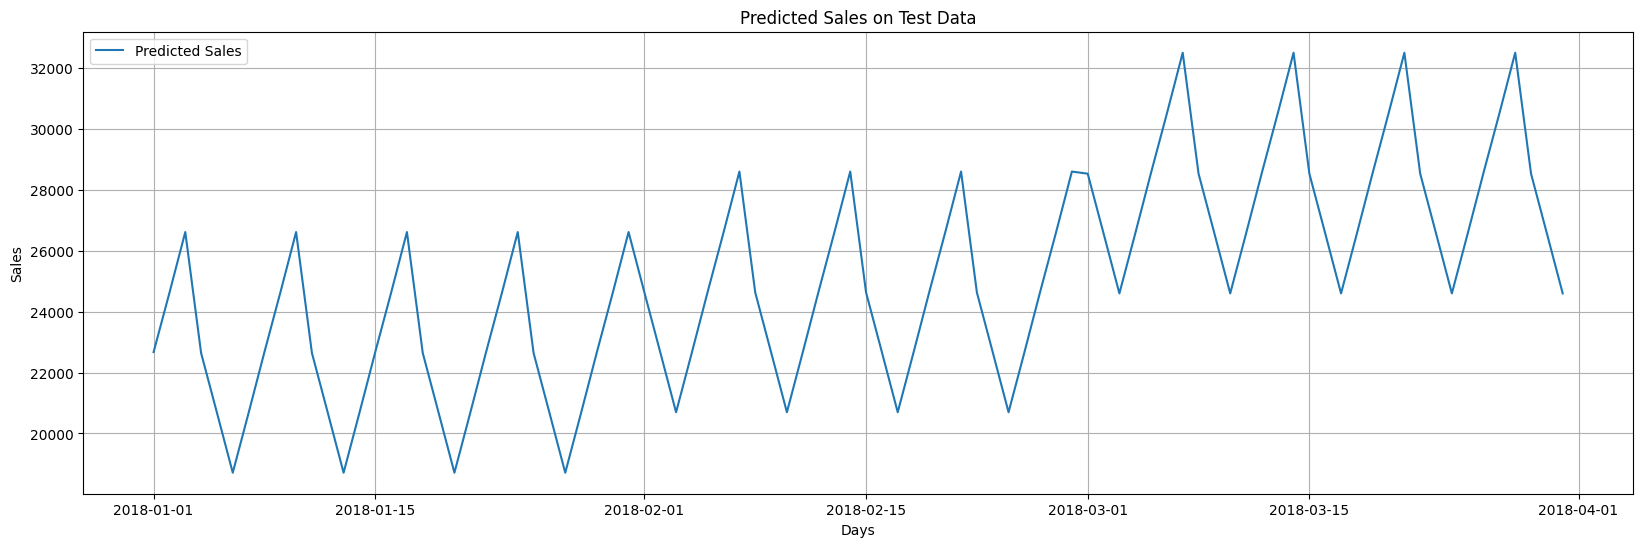

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test.groupby('date')['Predicted Sales'].sum().index, test.groupby('date')['Predicted Sales'].sum().values, label='Predicted Sales')
plt.title('Predicted Sales on Test Data')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

## Summary:

### Data Analysis Key Findings

*   **Library Explanations:** The purpose of key data science libraries was clearly defined: pandas for data manipulation, numpy for numerical operations, matplotlib for visualization, sklearn for machine learning, and tensorflow for deep learning.
*   **Data Loading and Preparation:** `train.csv` and `test.csv` were loaded, with dates parsed during loading. The training data was split into `X_train` (features: 'store', 'item') and `y_train` (target: 'sales'), and `X_test` was prepared similarly.
*   **Data Inspection:** `info()` was explained for checking null values, data types, and memory usage, while `.shape` was used to verify DataFrame dimensions.
*   **Descriptive Statistics:** The `describe()` method was used and explained to generate key statistics (count, mean, std, min, quartiles, max), providing initial insights into data distribution and potential outliers.
*   **Categorical Feature Conversion:** 'store' and 'item' columns were converted to 'category' data type for memory efficiency, improved performance, and compatibility with machine learning models.
*   **Sales Data Visualizations:** Explanations were provided for visualizations of daily sales (to observe trends and seasonality), total sales by store (to compare store performance), and total sales by item (to identify best/least-selling items).
*   **Feature Engineering (Training Data):** Time-based features ('month', 'year', 'day' of week) were extracted from the date index of `X_train` to capture seasonal and temporal patterns in sales.
*   **One-Hot Encoding (Training Data):** Categorical features ('store', 'item') and engineered time-based features ('month', 'year', 'day') in `X_train` were converted using One-Hot Encoding to a numerical format suitable for model training, creating `X_train_encoded_df`. The explanation clarified that this avoids implying ordinal relationships and is handled by `sklearn`'s `OneHotEncoder`.
*   **Linear Regression Model Training and Evaluation:** A `LinearRegression` model was trained after splitting the encoded training data into training and validation sets (80/20 split with `random_state=42`). Initial performance was evaluated using the R-squared score on the validation set.
*   **Training Data Predictions and Visualization:** Predictions were generated on the full training set, aggregated daily, and visualized against actual daily sales. This qualitative assessment helps understand the model's ability to capture trends and seasonality.
*   **Evaluation Metrics:** Root Mean Squared Error (RMSE) and R-squared (`r2_score`) were explained as quantitative measures for model performance. RMSE penalizes larger errors, while R-squared indicates the proportion of variance explained by the model.
*   **Feature Engineering and One-Hot Encoding (Test Data):** The same date-based feature engineering and One-Hot Encoding steps were applied to `X_test`, crucially using the *same fitted `OneHotEncoder` instance* to maintain consistency with the training data's feature set.
*   **Test Data Prediction:** Missing feature columns (e.g., years, months present in training but not fully in test) were explicitly added to the encoded `X_test` (`X_test_encoded_df`) with zero values to ensure an identical feature space as `X_train_encoded_df`. Finally, predictions were made on this prepared `X_test_encoded_df` using the trained model and stored in the original `test` DataFrame.

### Insights or Next Steps

*   The structured approach of data loading, cleaning, feature engineering, encoding, model training, and evaluation provides a robust framework for time-series forecasting tasks.
*   Maintaining strict consistency in feature engineering and encoding between training and test datasets is paramount for reliable model application. This includes using the same encoder instance and handling discrepancies in feature columns.


## Aggregate Forecasting

In [ ]:
YA_train = train.groupby('date')['sales'].sum()

In [ ]:
# Adding dummy variable for months as varying trend is observed in the data monthly
# Adding dummy variable for year and days of week as varying seasonality is observed in the data yearly and weekly.

XA_train = pd.DataFrame(YA_train.index, columns=['date'], index=YA_train.index)

XA_train['month'] = XA_train.index.month
XA_train['year'] = XA_train.index.year
XA_train['day'] = XA_train.index.dayofweek
XA_train = XA_train.drop('date', axis=1)

XA_train.head()

,month,year,day
date,,,
2013-01-01,1,2013,1
2013-01-02,1,2013,2
2013-01-03,1,2013,3
2013-01-04,1,2013,4
2013-01-05,1,2013,5


In [ ]:
#OneHotEncoding

XA_train_encoded = encoder.fit_transform(XA_train[['month','year', 'day']])

# Get the new feature names
feature_names_out = encoder.get_feature_names_out(['month','year', 'day'])

# Convert the dense array to a DataFrame
XA_train_encoded_df = pd.DataFrame(XA_train_encoded, columns=feature_names_out, index=XA_train.index)

XA_train_encoded_df.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2015,year_2016,year_2017,day_0,day_1,day_2,day_3,day_4,day_5,day_6
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

XA_t_train, XA_t_test, YA_t_train, YA_t_test = train_test_split(XA_train_encoded_df, YA_train, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(XA_t_train, YA_t_train)

model.score(XA_t_test, YA_t_test)

0.9827860433995683

In [ ]:
print(y_pred_df.shape)
print(daily_sales_of_items.shape)

(913000, 1)
(1826,)


            predicted sales
date                       
2013-01-01     11461.582031
2013-01-02     11448.619154
2013-01-03     13176.499778
2013-01-04     14876.031878
2013-01-05     16591.914423
count     1826.000000
mean     26124.038269
std       6364.184036
min       7925.068395
25%      21628.297394
50%      26403.464987
75%      30844.170750
max      41727.161076
Name: predicted sales, dtype: float64


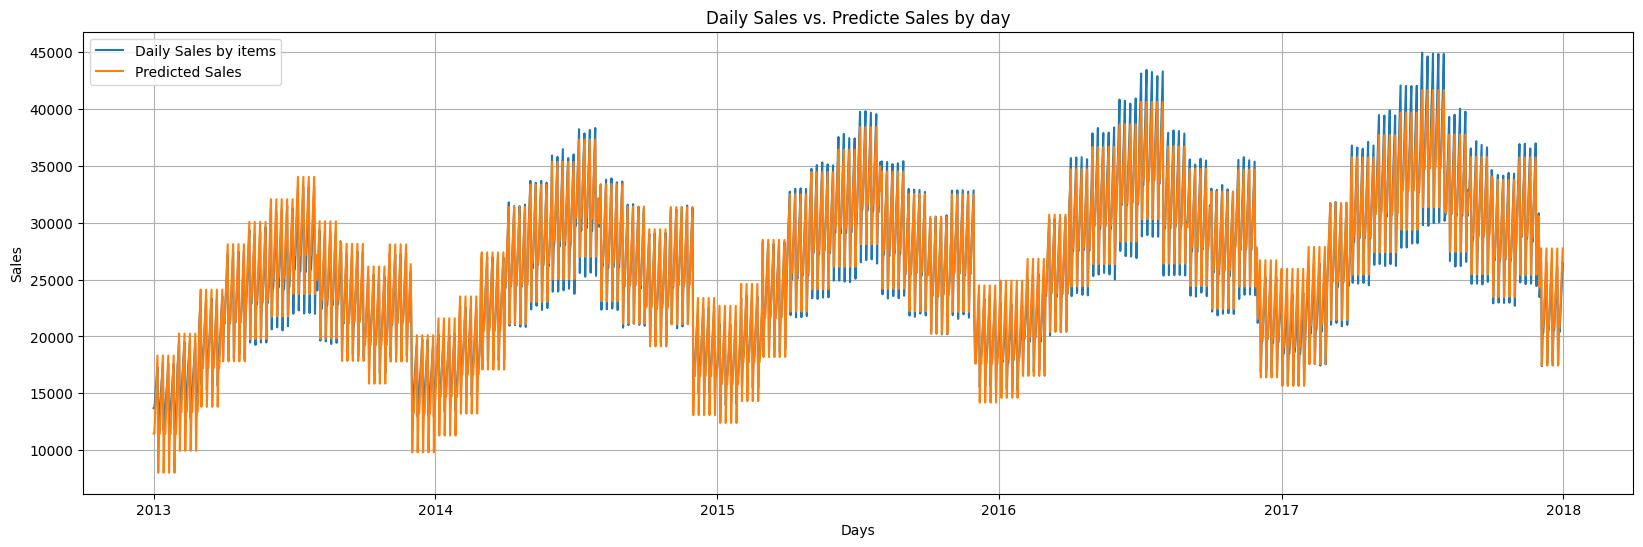

In [ ]:
y_pred_df = pd.DataFrame(model.predict(XA_train_encoded_df), index=YA_train.index, columns=['predicted sales'])

daily_sales_of_items = y_train.groupby('date')['sales'].sum()

print(y_pred_df.head())
print(daily_predicted_sales_of_items.describe())

plt.figure(figsize=(20, 6))
plt.plot(daily_sales_of_items.index, daily_sales_of_items.values, label='Daily Sales by items')
plt.plot(y_pred_df.index, y_pred_df.values, label='Predicted Sales')
plt.title('Daily Sales vs. Predicte Sales by day')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

In [ ]:
train.shape[1]

3

In [ ]:
train.shape[0]

913000

In [ ]:
percentage_store = train.reset_index()
percentage_store = percentage_store.groupby('store')['sales'].sum().reset_index()

percentage_store['%Sales_Store'] = percentage_store['sales']/percentage_store['sales'].sum()
percentage_store.head()

,store,sales,%Sales_Store
0,1,4315603,0.090465
1,2,6120128,0.128292
2,3,5435144,0.113934
3,4,5012639,0.105077
4,5,3631016,0.076115


In [ ]:
percentage_item_store = train.groupby(['store', 'item'])['sales'].sum().reset_index()

percentage_item_store['%Sales_Store_Item'] = percentage_item_store['sales']/percentage_item_store.groupby('store')['sales'].transform('sum')
percentage_item_store.head()

,store,item,sales,%Sales_Store_Item
0,1,1,36468,0.008450
1,1,2,97050,0.022488
2,1,3,60638,0.014051
3,1,4,36440,0.008444
4,1,5,30335,0.007029


In [ ]:
merged_df_1 = pd.merge(left = X_train, right = percentage_store, on=['store'], how='left').set_index(X_train.index)
merged_df = pd.merge(left = merged_df_1, right = percentage_item_store, on=['store', 'item'], how='left').set_index(X_train.index)

merged_df_r = merged_df.reset_index()

y_pred_df_r = y_pred_df.reset_index()


forecast = pd.merge(left = merged_df_r, right = y_pred_df_r, on=['date'], how='left').set_index(X_train.index)
print(forecast.head())

                 date  store  item  month  year  day  sales_x  %Sales_Store  \
date                                                                          
2013-01-01 2013-01-01      1     1      1  2013    1  4315603      0.090465   
2013-01-02 2013-01-02      1     1      1  2013    2  4315603      0.090465   
2013-01-03 2013-01-03      1     1      1  2013    3  4315603      0.090465   
2013-01-04 2013-01-04      1     1      1  2013    4  4315603      0.090465   
2013-01-05 2013-01-05      1     1      1  2013    5  4315603      0.090465   

            sales_y  %Sales_Store_Item  predicted sales  
date                                                     
2013-01-01    36468            0.00845     11461.582031  
2013-01-02    36468            0.00845     11448.619154  
2013-01-03    36468            0.00845     13176.499778  
2013-01-04    36468            0.00845     14876.031878  
2013-01-05    36468            0.00845     16591.914423  


In [ ]:
forecast['Y_SKU_STR'] = forecast['predicted sales']*forecast['%Sales_Store']*forecast['%Sales_Store_Item']
forecast.head()

,date,store,item,month,year,day,sales_x,%Sales_Store,sales_y,%Sales_Store_Item,predicted sales,Y_SKU_STR
date,,,,,,,,,,,,
2013-01-01,2013-01-01,1,1,1,2013,1,4315603,0.090465,36468,0.00845,11461.582031,8.761875
2013-01-02,2013-01-02,1,1,1,2013,2,4315603,0.090465,36468,0.00845,11448.619154,8.751966
2013-01-03,2013-01-03,1,1,1,2013,3,4315603,0.090465,36468,0.00845,13176.499778,10.072854
2013-01-04,2013-01-04,1,1,1,2013,4,4315603,0.090465,36468,0.00845,14876.031878,11.372072
2013-01-05,2013-01-05,1,1,1,2013,5,4315603,0.090465,36468,0.00845,16591.914423,12.683788


In [ ]:
forecast_y = forecast['Y_SKU_STR']
print(forecast_y.describe())

count    913000.000000
mean         52.238696
std          27.810056
min           3.911312
25%          29.916909
50%          47.191291
75%          69.743847
max         179.574596
Name: Y_SKU_STR, dtype: float64


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(r2_score(y_train['sales'], forecast_y.values))

0.9328525135014429
